In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
dataset = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv' , encoding='latin-1')

In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] , inplace=True)

In [7]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
dataset['v1'] = dataset['v1'].map({'ham':0 , 'spam':1})

In [9]:
dataset.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='v1', ylabel='count'>

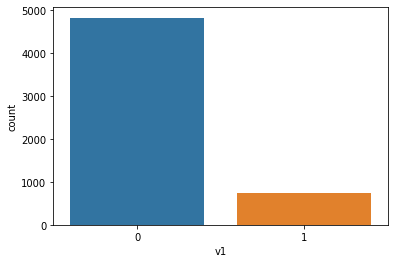

In [11]:
sns.countplot(dataset['v1'])

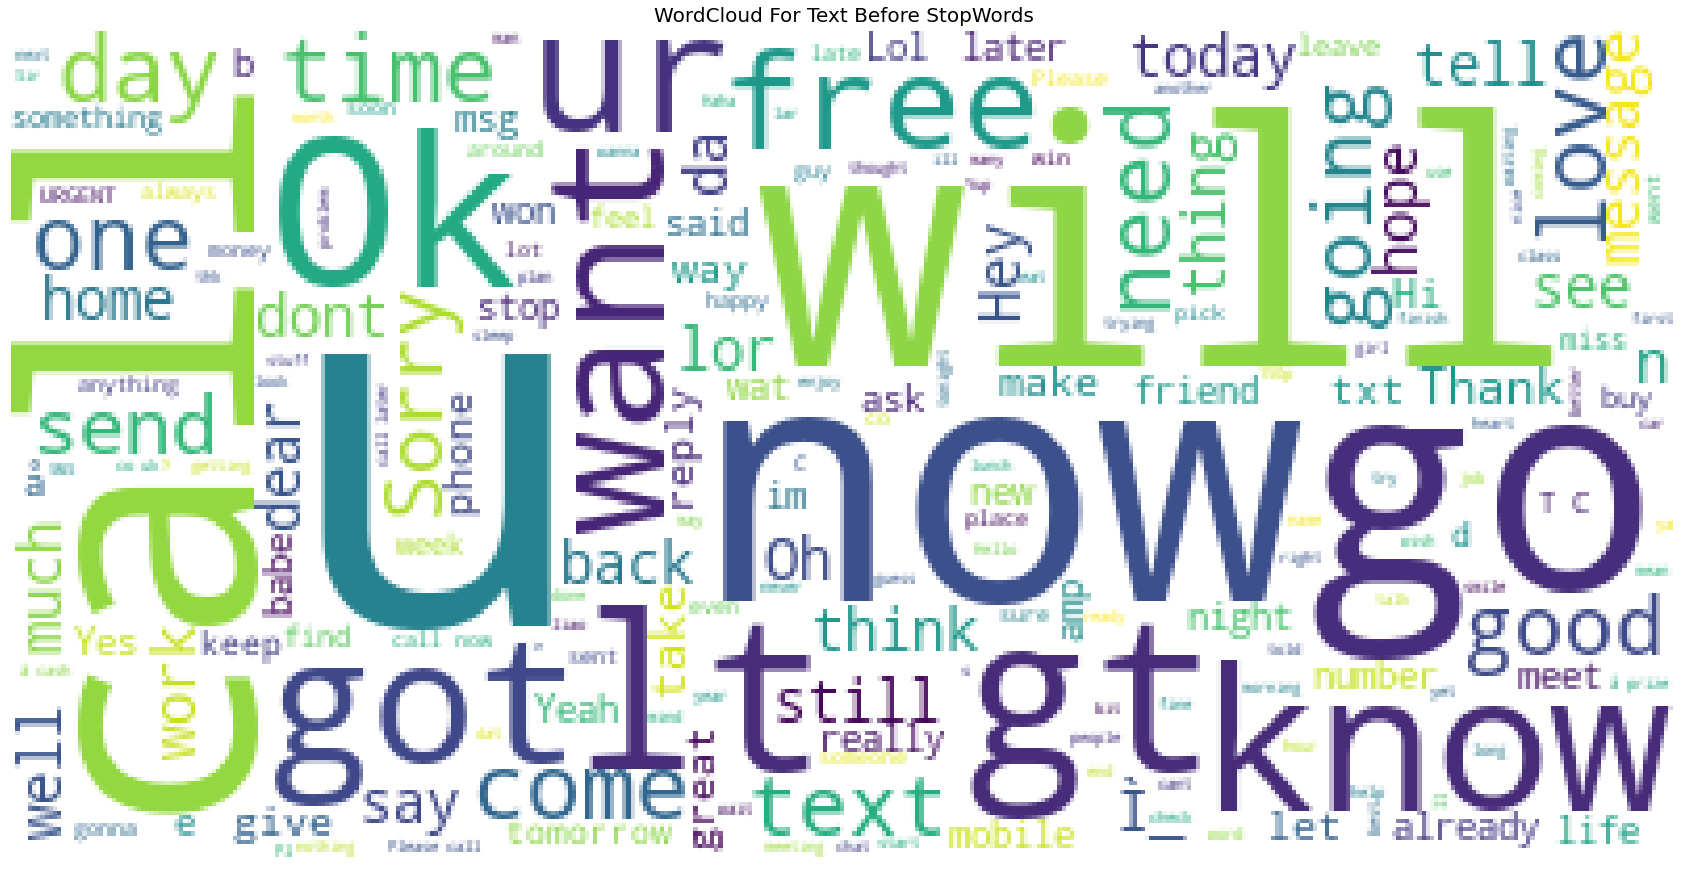

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
plt.imshow(WordCloud(background_color = 'white').generate(" ".join(dataset.v2)))
plt.axis("off")
plt.title("WordCloud For Text Before StopWords",fontsize=20)
plt.show()   

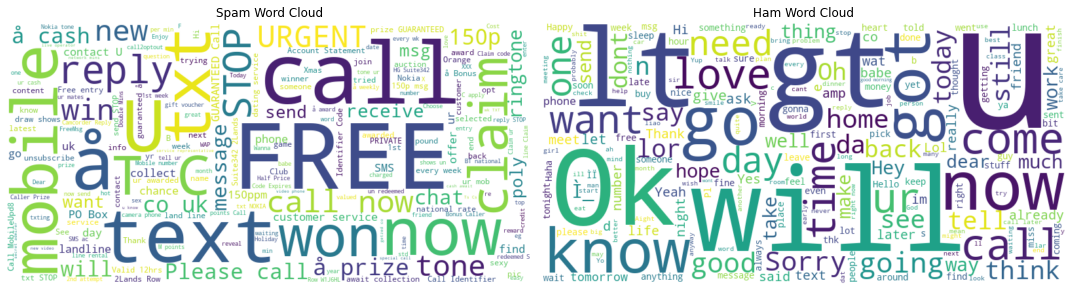

In [13]:
spam_data = dataset[dataset['v1'] == 1]
ham_data = dataset[dataset['v1'] == 0]

# Combine texts for spam and ham emails
spam_text = ' '.join(spam_data['v2'])
ham_text = ' '.join(ham_data['v2'])

# Generate word clouds for spam and ham emails
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Display the word clouds with titles using matplotlib
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("Spam Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("Ham Word Cloud")
plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [16]:
corpus = []

In [17]:
for i in range(0 ,len(dataset)):
  message = re.sub('[^a-zA-Z]' , ' ' , dataset['v2'][i])
  message = message.lower()
  message = message.split()
  ss = SnowballStemmer(language='english')
  message = [ss.stem(word) for word in message if not word in set(stopwords.words('english'))]
  message = ' '.join(message)
  corpus.append(message)

In [18]:
  def clean_text(text):
        message = re.sub('[^a-zA-Z]' , ' ' ,text)
        message = message.lower()
        message = message.split()
        ss = SnowballStemmer(language='english')
        message = [ss.stem(word) for word in message if not word in set(stopwords.words('english'))]
        message = ' '.join(message)
        return message

In [19]:
corpus[1]

'ok lar joke wif u oni'

In [20]:
len(corpus)

5572

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()
X= tfidf.fit_transform(corpus).toarray()
y = dataset.iloc[: , 0].values

In [22]:
X.shape

(5572, 6216)

In [23]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [24]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 0)

In [25]:
x_train.shape

(4457, 6216)

In [26]:
x_test.shape

(1115, 6216)

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train , y_train)

MultinomialNB()

In [28]:
y_pred = classifier.predict(x_test)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:>

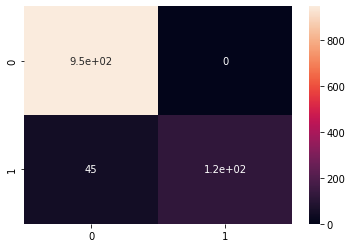

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

In [31]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(y_test , y_pred))
print(recall_score(y_test , y_pred))

1.0
0.7289156626506024


In [32]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9596412556053812
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       949
           1       1.00      0.73      0.84       166

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [33]:
txt = 'What\'s up buddy how are you doing man'


In [34]:
txt = np.array([txt])
txt

array(["What's up buddy how are you doing man"], dtype='<U37')

In [36]:
txt = tfidf.transform(txt)
txt

<1x6216 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [37]:
result=classifier.predict(txt)
if result[0]==0:
    print("Not Spam")
else:
    print('Spam')

Not Spam


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Split the data into training and testing sets

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf= TfidfVectorizer()
X= tfidf.fit_transform(corpus).toarray()
y = dataset.iloc[: , 0].values

X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 0)

# Initialize classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Support Vector Machine", SVC()),
    ("Multinomial Naive Bayes", MultinomialNB())
]

# Initialize a dataframe to store results
results_df = pd.DataFrame(columns=['Algorithm', 'Accuracy'])

# Iterate through classifiers, train, predict and store accuracy
for algorithm, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_df = results_df.append({'Algorithm': algorithm, 'Accuracy': accuracy}, ignore_index=True)

# Print the results dataframe
print(results_df)


                 Algorithm  Accuracy
0      Logistic Regression  0.957848
1   Support Vector Machine  0.972197
2  Multinomial Naive Bayes  0.959641
